## Importing the required packigase:

In [62]:
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pyarrow

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

import pickle

## Reading data

### Detainee_Profile

In [63]:
date_pro = pd.read_parquet('/kaggle/input/detainee-profile/Detainee_Profile.parquet', engine='pyarrow')
date_pro.head()

,Id,DetaineeId,FacilityId,DetaineeTimeInDetention,cbxReligion,PreferredLanguage,DetaineeGender,DetentionDetails,DetaineeDOB,DetentionReason,...,MedicalCategory,EscortRisk,DietaryCategory,BehaviourDetails,BahaviourCategory,FoodFluidRefusalCommencementDate,FoodFluidRefusalClosureDate,EnhancedMonitoringCommencementDate,DetaineeServiceID,ODS_Update_Datetime
0,9325,590,4,298,Not Stated,Not Stated,Male,From community,1973-07-02 00:00:00,Compliance,...,No Information,High,No Information,History,None,None,None,None,1-76QB83G,2017-03-15 16:05:50.000
1,3284875,25943,9,None,Christian (NFD),Fijian,Male,501,1999-04-23 00:00:00,Compliance,...,No Information,High,Self Disclosed,Sexual offences,None,None,None,2022-06-04 15:22:44,1-HUD03RQ,2022-08-11 05:03:55.143
2,3152322,21657,11,None,Not Stated,English,Male,501,1983-12-02 00:00:00,Compliance,...,None,High,None,None,None,None,None,2022-03-22 16:42:00,TEMP315232001,2022-05-16 05:04:05.203
3,9336,592,5,1178,Islam,Somali,Male,None,1994-12-31 00:00:00,IMA,...,Current,High,Self Disclosed,History,None,None,None,None,1-113NV5O,2017-06-08 15:05:51.000
4,3273679,25921,1,None,Not Stated,Vietnamese,Male,501,1967-01-19 00:00:00,Compliance,...,None,Medium,None,None,None,None,None,None,1-IOZIMZ7,2022-08-18 05:04:05.767


In [64]:
date_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Id                                  27622 non-null  int32         
 1   DetaineeId                          27622 non-null  int32         
 2   FacilityId                          27622 non-null  int32         
 3   DetaineeTimeInDetention             4381 non-null   object        
 4   cbxReligion                         27467 non-null  object        
 5   PreferredLanguage                   27468 non-null  object        
 6   DetaineeGender                      27469 non-null  object        
 7   DetentionDetails                    25644 non-null  object        
 8   DetaineeDOB                         27437 non-null  object        
 9   DetentionReason                     27466 non-null  object        
 10  DetaineeCitizenship   

In [65]:
date_pro = date_pro[['DetaineeServiceID','ODS_Update_Datetime','cbxReligion', 'PreferredLanguage' , 'DetaineeGender'  , 'DetentionReason' , 'DetaineeCitizenship' , 'DetaineeMaritalStatus' , 'DetaineeFamilyStatus' , 'SelfHarmDetails' , 'SelfHarmCategory' , 'SelfAdminMedCategory' , 'SelfAdminMedDetails' , 'PlacementRisk' , 'MedicalDetails' , 'MedicalCategory' , 'EscortRisk' ,'BehaviourDetails' ,'DetaineeDOB']]
date_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DetaineeServiceID      27552 non-null  object        
 1   ODS_Update_Datetime    27622 non-null  datetime64[ns]
 2   cbxReligion            27467 non-null  object        
 3   PreferredLanguage      27468 non-null  object        
 4   DetaineeGender         27469 non-null  object        
 5   DetentionReason        27466 non-null  object        
 6   DetaineeCitizenship    27469 non-null  object        
 7   DetaineeMaritalStatus  18644 non-null  object        
 8   DetaineeFamilyStatus   20398 non-null  object        
 9   SelfHarmDetails        1450 non-null   object        
 10  SelfHarmCategory       10080 non-null  object        
 11  SelfAdminMedCategory   9171 non-null   object        
 12  SelfAdminMedDetails    246 non-null    object        
 13  P

In [66]:
date_pro.describe()

,DetaineeServiceID,ODS_Update_Datetime,cbxReligion,PreferredLanguage,DetaineeGender,DetentionReason,DetaineeCitizenship,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmDetails,SelfHarmCategory,SelfAdminMedCategory,SelfAdminMedDetails,PlacementRisk,MedicalDetails,MedicalCategory,EscortRisk,BehaviourDetails,DetaineeDOB
count,27552,27622,27467,27468,27469,27466,27469,18644,20398,1450,10080,9171,246,24901,2066,10125,24909,2574,27437
unique,27456,7595,148,205,9,8,219,13,8,287,4,3,81,7,1037,5,7,373,24324
top,1-CO3F8ND,2023-01-19 05:04:23.513000,Not Stated,English,Male,Compliance,MALAYSIA,Single,Single Adult Male,Nil,No Information,No,No Information,High,Nil,No Information,High,Compliant,1994-12-31 00:00:00
freq,3,1044,10842,14279,21784,25627,5110,10917,15719,598,8628,8923,134,15595,547,8058,19745,878,21
first,NaN,2016-09-29 15:12:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-01-19 09:08:17.047000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Incident_Detainees

In [67]:
date_inci = pd.read_parquet('/kaggle/input/detainee-profile/Incident_Detainees.parquet', engine='pyarrow')
date_inci.head()

,Id,Seq,IncidentDetaineeParticipationType,IncidentDetaineeParticipantArmed,DetaineeServiceID,ODS_Update_Datetime
0,4952,101,Involved,Yes,1-84NCMFB,2016-10-27 16:06:03
1,4019,101,Involved,No,1-8PPTC3R,2016-10-18 16:06:01
2,6476,101,Involved,No,1-125VTI6,2016-10-31 04:05:42
3,3145,101,Involved,No,1-8HPEZMQ,2016-10-18 16:06:01
4,8136,101,Involved,No,1-8SJ5H7O,2016-10-18 16:06:01


In [68]:
date_inci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121477 entries, 0 to 121476
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Id                                 121477 non-null  int32         
 1   Seq                                121477 non-null  int32         
 2   IncidentDetaineeParticipationType  121435 non-null  object        
 3   IncidentDetaineeParticipantArmed   121401 non-null  object        
 4   DetaineeServiceID                  121390 non-null  object        
 5   ODS_Update_Datetime                121477 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 4.6+ MB


In [69]:
date_inci = date_inci[['Id','IncidentDetaineeParticipationType','DetaineeServiceID']]
date_inci.head()

,Id,IncidentDetaineeParticipationType,DetaineeServiceID
0,4952,Involved,1-84NCMFB
1,4019,Involved,1-8PPTC3R
2,6476,Involved,1-125VTI6
3,3145,Involved,1-8HPEZMQ
4,8136,Involved,1-8SJ5H7O


### Incident_Report

In [70]:
repo_inci = pd.read_parquet('/kaggle/input/detainee-profile/Incident_Report.parquet', engine='pyarrow')
repo_inci.head()

,Id,FacilityId,IncidentType,IncidentTransportNumber,IncidentSensitive,PortalIRNumber,DateOccured,LocationDetails,IncidentLinkedParticipantDetainee,IncidentDamge,ActualIncidentResolved,IncidentLevel,ODS_Update_Datetime
0,4952,1,Planned Use Of Force,None,No,1-8QI9K9G,2016-10-10 16:30:57,Brisbane ITA Offsite,1,No,2016-10-13 00:00:00,Minor,2016-10-27 16:06:03
1,4019,1,Planned Use Of Force,1-18917877007,No,1-8PRXY4R,2016-10-07 10:00:25,Brisbane ITA Offsite,1,No,2016-10-07 10:45:00,Minor,2016-10-18 16:06:01
2,6391,1,Failure - security systems,None,No,1-8S8A7EJ,2016-10-16 04:34:06,BITA,0,No,2016-10-16 04:34:10,Major,2016-12-09 14:45:15
3,3145,1,Planned Use Of Force,1-18837900852,No,1-8OJKYY8,2016-10-04 09:50:00,BITA,1,No,2016-10-04 11:00:00,Minor,2016-10-18 16:06:01
4,3951,1,Planned Use Of Force,1-18806188162,No,1-8PJ9OV8,2016-10-07 05:15:55,Brisbane ITA Offsite,0,No,2016-10-07 05:30:00,Minor,2016-10-18 16:06:01


In [71]:
repo_inci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103495 entries, 0 to 103494
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Id                                 103495 non-null  int32         
 1   FacilityId                         103495 non-null  int32         
 2   IncidentType                       103313 non-null  object        
 3   IncidentTransportNumber            20453 non-null   object        
 4   IncidentSensitive                  103315 non-null  object        
 5   PortalIRNumber                     102607 non-null  object        
 6   DateOccured                        103218 non-null  object        
 7   LocationDetails                    102406 non-null  object        
 8   IncidentLinkedParticipantDetainee  103494 non-null  object        
 9   IncidentDamge                      103463 non-null  object        
 10  ActualIncidentResolv

In [72]:
repo_inci = repo_inci[['Id','IncidentType','DateOccured','IncidentLevel']]
repo_inci.head()

,Id,IncidentType,DateOccured,IncidentLevel
0,4952,Planned Use Of Force,2016-10-10 16:30:57,Minor
1,4019,Planned Use Of Force,2016-10-07 10:00:25,Minor
2,6391,Failure - security systems,2016-10-16 04:34:06,Major
3,3145,Planned Use Of Force,2016-10-04 09:50:00,Minor
4,3951,Planned Use Of Force,2016-10-07 05:15:55,Minor


## Cleaning

In [73]:
data = date_pro.merge(date_inci,on='DetaineeServiceID').merge(repo_inci,on='Id')
data.head()

,DetaineeServiceID,ODS_Update_Datetime,cbxReligion,PreferredLanguage,DetaineeGender,DetentionReason,DetaineeCitizenship,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmDetails,...,MedicalDetails,MedicalCategory,EscortRisk,BehaviourDetails,DetaineeDOB,Id,IncidentDetaineeParticipationType,IncidentType,DateOccured,IncidentLevel
0,1-76QB83G,2017-03-15 16:05:50.000,Not Stated,Not Stated,Male,Compliance,SCOTLAND,Defacto,Single Adult Male,None,...,None,No Information,High,History,1973-07-02 00:00:00,150716,Involved,Use of Force - Planned,2017-01-30 09:14:43,Minor
1,1-76QB83G,2017-03-15 16:05:50.000,Not Stated,Not Stated,Male,Compliance,SCOTLAND,Defacto,Single Adult Male,None,...,None,No Information,High,History,1973-07-02 00:00:00,120516,Involved,Use of Force - Planned,2017-01-11 10:45:39,Minor
2,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,None,...,None,No Information,High,Sexual offences,1999-04-23 00:00:00,3364132,Involved,Use of Force - Planned,2022-08-10 02:40:00,Minor
3,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,None,...,None,No Information,High,Sexual offences,1999-04-23 00:00:00,3286743,Involved,Use of Force,2022-06-06 10:55:00,Major
4,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,None,...,None,No Information,High,Sexual offences,1999-04-23 00:00:00,3290589,Involved,Use of Force,2022-06-09 17:15:00,Major


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120292 entries, 0 to 120291
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   DetaineeServiceID                  114202 non-null  object        
 1   ODS_Update_Datetime                120292 non-null  datetime64[ns]
 2   cbxReligion                        114721 non-null  object        
 3   PreferredLanguage                  114721 non-null  object        
 4   DetaineeGender                     114721 non-null  object        
 5   DetentionReason                    114720 non-null  object        
 6   DetaineeCitizenship                114721 non-null  object        
 7   DetaineeMaritalStatus              85002 non-null   object        
 8   DetaineeFamilyStatus               91321 non-null   object        
 9   SelfHarmDetails                    13929 non-null   object        
 10  SelfHarmCategory    

In [75]:
data.drop(['DetaineeServiceID','ODS_Update_Datetime','Id'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120292 entries, 0 to 120291
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   cbxReligion                        114721 non-null  object
 1   PreferredLanguage                  114721 non-null  object
 2   DetaineeGender                     114721 non-null  object
 3   DetentionReason                    114720 non-null  object
 4   DetaineeCitizenship                114721 non-null  object
 5   DetaineeMaritalStatus              85002 non-null   object
 6   DetaineeFamilyStatus               91321 non-null   object
 7   SelfHarmDetails                    13929 non-null   object
 8   SelfHarmCategory                   54389 non-null   object
 9   SelfAdminMedCategory               48223 non-null   object
 10  SelfAdminMedDetails                1604 non-null    object
 11  PlacementRisk                      113231 non-null  

In [76]:
data.dropna(subset=['DateOccured','IncidentLevel'],inplace=True)

In [77]:
data['DateOccured'] = pd.to_datetime(repo_inci.DateOccured,errors = 'coerce')
data['DetaineeDOB'] = pd.to_datetime(repo_inci.DateOccured,errors = 'coerce')
data['year'] = data.DateOccured.dt.year
data['quarter'] = data.DateOccured.dt.quarter
data['month'] = data.DateOccured.dt.month
data['dayofmonth'] = data.DateOccured.dt.day
data['dayofweek'] = data.DateOccured.dt.day_of_week
data['weekofyear'] = data.DateOccured.dt.weekofyear
data['dayofyear'] = data.DateOccured.dt.day_of_year
data['hour'] = data.DateOccured.dt.hour
data = data[data.year<=2022]
data['age'] = 2022 -  data['DetaineeDOB'].dt.year
data.drop(['DetaineeDOB','DateOccured'],axis=1,inplace=True)
data.head()

,cbxReligion,PreferredLanguage,DetaineeGender,DetentionReason,DetaineeCitizenship,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmDetails,SelfHarmCategory,SelfAdminMedCategory,...,IncidentLevel,year,quarter,month,dayofmonth,dayofweek,weekofyear,dayofyear,hour,age
0,Not Stated,Not Stated,Male,Compliance,SCOTLAND,Defacto,Single Adult Male,None,No Information,None,...,Minor,2016.00,4.00,10.00,10.00,0.00,41.00,284.00,16.00,6
1,Not Stated,Not Stated,Male,Compliance,SCOTLAND,Defacto,Single Adult Male,None,No Information,None,...,Minor,2016.00,4.00,10.00,7.00,4.00,40.00,281.00,10.00,6
2,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,None,No Information,No,...,Minor,2016.00,4.00,10.00,16.00,6.00,41.00,290.00,4.00,6
3,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,None,No Information,No,...,Major,2016.00,4.00,10.00,4.00,1.00,40.00,278.00,9.00,6
4,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,None,No Information,No,...,Major,2016.00,4.00,10.00,7.00,4.00,40.00,281.00,5.00,6


In [78]:
data.fillna('Unknown',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103103 entries, 0 to 103494
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   cbxReligion                        103103 non-null  object 
 1   PreferredLanguage                  103103 non-null  object 
 2   DetaineeGender                     103103 non-null  object 
 3   DetentionReason                    103103 non-null  object 
 4   DetaineeCitizenship                103103 non-null  object 
 5   DetaineeMaritalStatus              103103 non-null  object 
 6   DetaineeFamilyStatus               103103 non-null  object 
 7   SelfHarmDetails                    103103 non-null  object 
 8   SelfHarmCategory                   103103 non-null  object 
 9   SelfAdminMedCategory               103103 non-null  object 
 10  SelfAdminMedDetails                103103 non-null  object 
 11  PlacementRisk                      1031

In [79]:
cat_columns = [column for column in data.columns if data[column].dtype == 'object']
cat_columns

['cbxReligion',
 'PreferredLanguage',
 'DetaineeGender',
 'DetentionReason',
 'DetaineeCitizenship',
 'DetaineeMaritalStatus',
 'DetaineeFamilyStatus',
 'SelfHarmDetails',
 'SelfHarmCategory',
 'SelfAdminMedCategory',
 'SelfAdminMedDetails',
 'PlacementRisk',
 'MedicalDetails',
 'MedicalCategory',
 'EscortRisk',
 'BehaviourDetails',
 'IncidentDetaineeParticipationType',
 'IncidentType',
 'IncidentLevel']

In [80]:
for col in cat_columns:
    data[col] = data[col].str.lower().str.strip()

In [81]:
data.nunique()

cbxReligion                           96
PreferredLanguage                    113
DetaineeGender                         5
DetentionReason                        8
DetaineeCitizenship                  188
DetaineeMaritalStatus                 11
DetaineeFamilyStatus                   6
SelfHarmDetails                      225
SelfHarmCategory                       4
SelfAdminMedCategory                   3
SelfAdminMedDetails                   54
PlacementRisk                          5
MedicalDetails                       737
MedicalCategory                        4
EscortRisk                             5
BehaviourDetails                     290
IncidentDetaineeParticipationType      5
IncidentType                          69
IncidentLevel                          3
year                                  14
quarter                                4
month                                 12
dayofmonth                            31
dayofweek                              7
weekofyear      

In [82]:
data.drop(['cbxReligion','PreferredLanguage','DetaineeCitizenship','SelfHarmDetails','SelfAdminMedDetails','SelfAdminMedDetails','MedicalDetails','BehaviourDetails','IncidentType'] ,axis=1, inplace=True)
data.nunique()

DetaineeGender                         5
DetentionReason                        8
DetaineeMaritalStatus                 11
DetaineeFamilyStatus                   6
SelfHarmCategory                       4
SelfAdminMedCategory                   3
PlacementRisk                          5
MedicalCategory                        4
EscortRisk                             5
IncidentDetaineeParticipationType      5
IncidentLevel                          3
year                                  14
quarter                                4
month                                 12
dayofmonth                            31
dayofweek                              7
weekofyear                            53
dayofyear                            366
hour                                  24
age                                   14
dtype: int64

## Preprocessing

In [114]:
X_train_full = data.drop(['IncidentLevel'], axis =1)
target_enco = OrdinalEncoder()
y_train_full = target_enco.fit_transform(data.IncidentLevel.to_numpy().reshape(-1, 1))

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2, random_state=42)

In [115]:
# Geting the names of the numrical columns.
cat_columns = [column for column in X_train.columns if X_train[column].dtype == 'object']
cat_columns

['DetaineeGender',
 'DetentionReason',
 'DetaineeMaritalStatus',
 'DetaineeFamilyStatus',
 'SelfHarmCategory',
 'SelfAdminMedCategory',
 'PlacementRisk',
 'MedicalCategory',
 'EscortRisk',
 'IncidentDetaineeParticipationType']

In [116]:
# Geting the names of the numrical columns.
num_columns = [column for column in X_train.columns if X_train[column].dtype != 'object']
num_columns

['year',
 'quarter',
 'month',
 'dayofmonth',
 'dayofweek',
 'weekofyear',
 'dayofyear',
 'hour',
 'age']

In [117]:
# A categorical transformer.
cat_trans = Pipeline(steps = [
    ('imputer',OrdinalEncoder())
])

# A numrical transformer.
num_trans = Pipeline(steps = [
    ('imputer',KNNImputer(n_neighbors = 5)),
    ('scaler',StandardScaler())
])

# A preprocessor that combines the two previous transformers.
preprocessor = ColumnTransformer(transformers = [
    ('num', num_trans, num_columns),
    ('cat', cat_trans, cat_columns)
],
    remainder = "drop")

In [118]:
preprocessor.fit(X_train)
X_train_trans = preprocessor.fit_transform(X_train)
X_valid_trans = preprocessor.transform(X_valid)

In [119]:
X_train_trans.shape

(82482, 19)

In [120]:
X_train_trans = pd.DataFrame(X_train_trans, index=X_train.index, columns=X_train.columns)
X_valid_trans = pd.DataFrame(X_valid_trans, index=X_valid.index, columns=X_valid.columns)

In [121]:
X_valid_trans.head()

,DetaineeGender,DetentionReason,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmCategory,SelfAdminMedCategory,PlacementRisk,MedicalCategory,EscortRisk,IncidentDetaineeParticipationType,year,quarter,month,dayofmonth,dayofweek,weekofyear,dayofyear,hour,age
30577,-0.79,0.42,0.40,0.49,-1.45,0.47,0.44,0.18,0.79,0.00,1.00,8.00,2.00,1.00,0.00,1.00,1.00,1.00,0.00
30269,-0.79,0.42,0.69,-1.46,-1.45,0.60,0.57,-1.21,0.79,2.00,1.00,8.00,3.00,1.00,0.00,1.00,1.00,1.00,1.00
88684,1.57,-1.36,-1.32,-1.00,-1.45,-1.38,-1.39,-0.22,-1.57,2.00,1.00,9.00,5.00,3.00,1.00,1.00,3.00,1.00,1.00
48762,-0.20,0.42,0.12,1.75,-0.37,0.27,0.25,0.38,0.20,2.00,1.00,4.00,3.00,1.00,1.00,3.00,0.00,1.00,1.00
20807,-0.79,-1.36,-1.04,-0.20,-0.37,-1.05,-1.06,0.38,0.79,2.00,1.00,8.00,3.00,3.00,1.00,1.00,3.00,1.00,1.00


## Modeling:

In [122]:
xgb = XGBClassifier().fit(X_train_trans,y_train)

0.7985548712477571


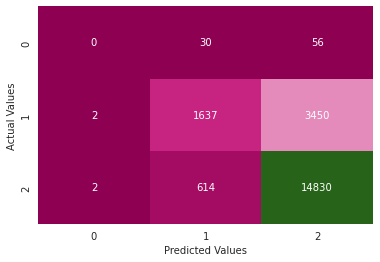

In [123]:
def cf(model, X_valid = X_valid_trans, y_valid_ = y_valid):
    
    y_pred = model.predict(X_valid)
    confusionMatrix = confusion_matrix(y_valid_, y_pred)
    print('accuracy score:',accuracy_score(y_valid_, y_pred))
    sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='PiYG')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
cf(xgb)

In [124]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=0).fit(X_valid_trans, y_valid)
eli5.show_weights(perm, feature_names = X_valid_trans.columns.tolist())

Weight,Feature
0.0683 ± 0.0025,year
0.0354 ± 0.0027,age
0.0246 ± 0.0010,IncidentDetaineeParticipationType
0.0134 ± 0.0014,DetaineeGender
0.0047 ± 0.0010,hour
0.0046 ± 0.0018,PlacementRisk
0.0024 ± 0.0004,quarter
0.0019 ± 0.0004,dayofweek
0.0013 ± 0.0005,weekofyear
0.0009 ± 0.0009,dayofyear


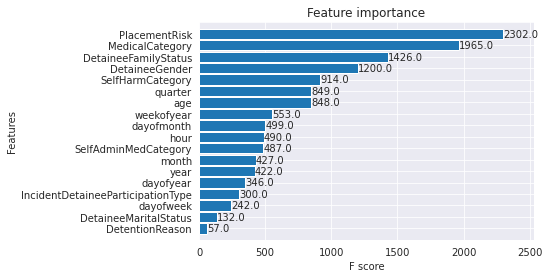

In [125]:
from xgboost import plot_importance, plot_tree

_ = plot_importance(xgb, height=0.9)

In [193]:
imp_cols = ['year','DetaineeGender','PlacementRisk','DetaineeFamilyStatus','age','quarter','hour','weekofyear','dayofweek']
X_train_trans_ = X_train_trans[imp_cols]
X_valid_trans_ = X_valid_trans[imp_cols]
X_valid_trans_.head()

,year,DetaineeGender,PlacementRisk,DetaineeFamilyStatus,age,quarter,hour,weekofyear,dayofweek
30577,1.00,-0.79,0.44,0.49,0.00,8.00,1.00,1.00,0.00
30269,1.00,-0.79,0.57,-1.46,1.00,8.00,1.00,1.00,0.00
88684,1.00,1.57,-1.39,-1.00,1.00,9.00,1.00,1.00,1.00
48762,1.00,-0.20,0.25,1.75,1.00,4.00,1.00,3.00,1.00
20807,1.00,-0.79,-1.06,-0.20,1.00,8.00,1.00,1.00,1.00


In [194]:
xgb = XGBClassifier().fit(X_train_trans_,y_train)

0.798651859754619


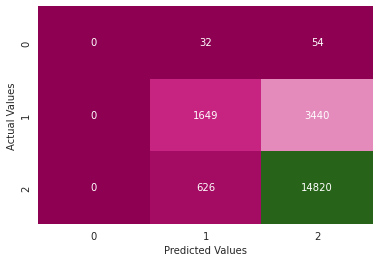

In [195]:
cf(xgb, X_valid_trans_)

In [202]:
parameters = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 1],
    "reg_lambda": [0, 1, 10]
}

xgb = XGBClassifier()

grid = GridSearchCV(
    estimator=xgb,
    param_grid=parameters
).fit(X_train_trans_,y_train)

In [203]:
xgb = grid.best_estimator_
xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [204]:
xgb.fit(X_train_trans_,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

0.7998157218369624


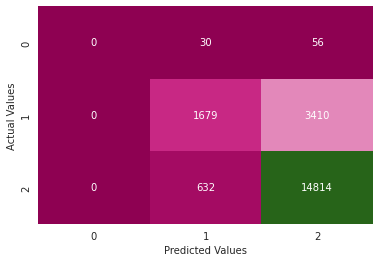

In [205]:
cf(xgb, X_valid_trans_)

In [221]:
y_valid_ = target_enco.inverse_transform(y_valid)
y_pred_ = target_enco.inverse_transform(xgb.predict(X_valid_trans_).reshape(-1, 1))
res = pd.DataFrame(y_valid_, columns=['Actual Level'])
res['Predicted Level'] = y_pred_
res

,Actual Level,Predicted Level
0,minor,minor
1,minor,minor
2,minor,minor
3,minor,minor
4,minor,minor
...,...,...
20616,minor,minor
20617,minor,minor
20618,major,minor
20619,minor,minor


In [222]:
res.to_excel('XGBoost Incident Level Predictions.xlsx',index=False)